# Exercise 5.1

In [2]:
import numpy as np

def roll_dice():
    return np.random.choice([1,2,3,4,5,6])

def experiment_sum8(N):
    count = 0
    for exp in range(N):
        first = roll_dice()
        second = roll_dice()
        if (first + second == 8) :
            count += 1
    return count/N

def experiment_sum8_one6(N):
    count = 0
    for exp in range(N):
        first = roll_dice()
        second = roll_dice()
        if (first + second == 8) and (first == 6 or second == 6):
            count += 1
    return count/N

def trial(experiment_name,No_of_trials,No_of_experiments):
    outcome = []
    for trial in range(No_of_trials):
        outcome.append(experiment_name(No_of_experiments))   
    
    return np.array(outcome).mean()
        
def probability_sum8():
    return trial(experiment_sum8,100,1000)

def probability_sum8_one6():
    return trial(experiment_sum8_one6,100,1000)

#print(f'Probability of geting a total of 8 out of rolling two dice is = {probability_sum8()}')
print(f'Probability of geting a total of 8 and one of the dice is 6 out of rolling two dice is = {probability_sum8_one6()}')

Probability of geting a total of 8 and one of the dice is 6 out of rolling two dice is = 0.05601


# Exercise 5.2

In [3]:
from collections import Counter
def experiment_100dice_all6(N):
    count = 0
    for exp in range(N):
        outcome = [roll_dice() for roll in range(100)]
        if Counter(outcome)[6] == 100 :
          count += 1  
    return count/N

def probability_100dice_all6():
    return trial(experiment_100dice_all6,100,1000)

print(f'Probability of geting a all 6 in rolling 100 dice is = {probability_100dice_all6()}')

Probability of geting a all 6 in rolling 100 dice is = 0.0


In [6]:
def experiment_100dice_no6(N):
    count = 0
    for exp in range(N):
        outcome = [roll_dice() for roll in range(100)]
        if Counter(outcome)[6] == 0 :
          count += 1  
    return count/N

def probability_100dice_no6():
    return trial(experiment_100dice_all6,100,1000)

print(f'Probability of geting a no 6 in rolling 100 dice is = {probability_100dice_no6()}')

Probability of geting a no 6 in rolling 100 dice is = 0.0


# Exercise 5.4

In [9]:
import numpy as np
trials = 1000
number_of_wins_stick = 0
number_of_wins_switch = 0
for i in range(trials):
    winning_door = np.random.randint(3)
    guess = np.random.randint(3)
    if guess == winning_door:
        number_of_wins_stick += 1
    else:
        number_of_wins_switch += 1
print("Probability of winning when sticks: " + str(number_of_wins_stick/trials))
print("Probability of winning when switches: " + str(number_of_wins_switch/trials))

Probability of winning when sticks: 0.341
Probability of winning when switches: 0.659


# Exercise 5.5

In [10]:
import random
trials = 1000
number_of_wins_stick = 0
number_of_wins_switch = 0
for i in range(trials):
    doors = [0, 1, 2]
    winning_door = np.random.randint(3)
    guess = np.random.randint(3)
    doors.remove(guess)
    result_switch = random.choice(doors) # As one door is removed randomly
    if guess == winning_door:
        number_of_wins_stick += 1
    elif result_switch == winning_door:
        number_of_wins_switch += 1
print("Probability of winning when sticks: " + str(number_of_wins_stick/trials))
print("Probability of winning when switches: " + str(number_of_wins_switch/trials))

Probability of winning when sticks: 0.31
Probability of winning when switches: 0.336


# Exercise 5.6

In [11]:
def baker(N):
    mu = 950
    sigma = 50
    poin = np.random.normal(mu,sigma,N).max()
    return poin

def get_n():
    trials = 1000
    n = 2
    while n>1:
        m = []
        for i in range(365):
            m.append(baker(n))
       
        if round(np.array(m).mean()) >= 1000:
            return n,m

        else:
            n += 1
            
n,m = get_n()        
print(f'The value of n is {n} and, average is {np.array(m).mean()} std is {np.array(m).std()}')            
        


The value of n is 4 and, average is 1002.9626667910647 std is 35.72003307964105


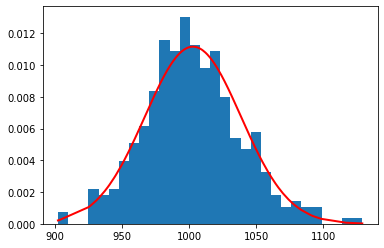

In [13]:
import matplotlib.pyplot as plt
plt.hist(m, 30, density=True)
m.sort()
sample = np.array(m)
mu = sample.mean()
sigma = sample.std()
plt.plot(sample, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (sample - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

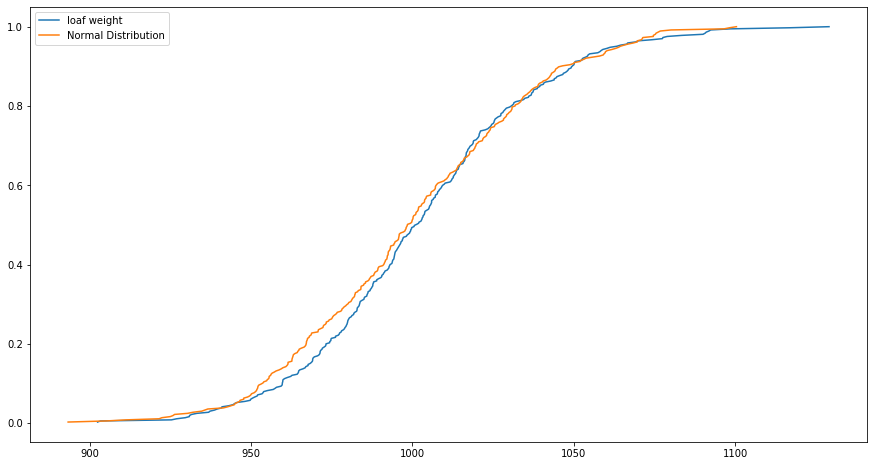

In [14]:
from empiricaldist import Cdf
m_cdf = Cdf.from_seq(m)
sample = np.random.normal(mu,sigma,len(m))
sample_cdf = Cdf.from_seq(sample)
fig,ax = plt.subplots(figsize = (15,8))
m_cdf.plot(label = 'loaf weight')
sample_cdf.plot(label = 'Normal Distribution')
plt.legend()
plt.show()


In [15]:
print(f'Probability of getting a loaf of 1000 gm or less is {round(m_cdf(1000)*100,2)} %')

Probability of getting a loaf of 1000 gm or less is 49.32 %


# Exercise 5.7

In [22]:
men_mu = 178
men_sigma = np.sqrt(59.4)
women_mu = 163
women_sigma =np.sqrt(52.8)
trial = 1000
fav_case = 0
for i in range(trial):
    m_height = np.random.normal(men_mu,men_sigma,1)
    w_height = np.random.normal(women_mu,women_sigma,1)
    if w_height > m_height :
        fav_case += 1
print(f'Probability that women is taller than men = {(fav_case/1000)*100} %')

Probability that women is taller than men = 8.6 %
